In [1]:
# Quantos clientes novos vão acionar a seguradora?

# Biblioteca modelagem de dados
import pandas as pd
# Biblioteca para recursos matemáticos
import numpy as np
# Bibliotecas de plotagem de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca/ função para ignorar avisos
from warnings import filterwarnings

In [2]:
# Plan1 = Base de dados
# Plan2 = Novas entradas
Base_Dados = pd.read_excel("BaseDados_FlorestaDeDecisão.xlsx", "Plan1")

In [3]:
# 1 = Não usou
# 2 = Serviço
# 3 = Furto
Base_Dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [4]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [5]:
Base_Dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


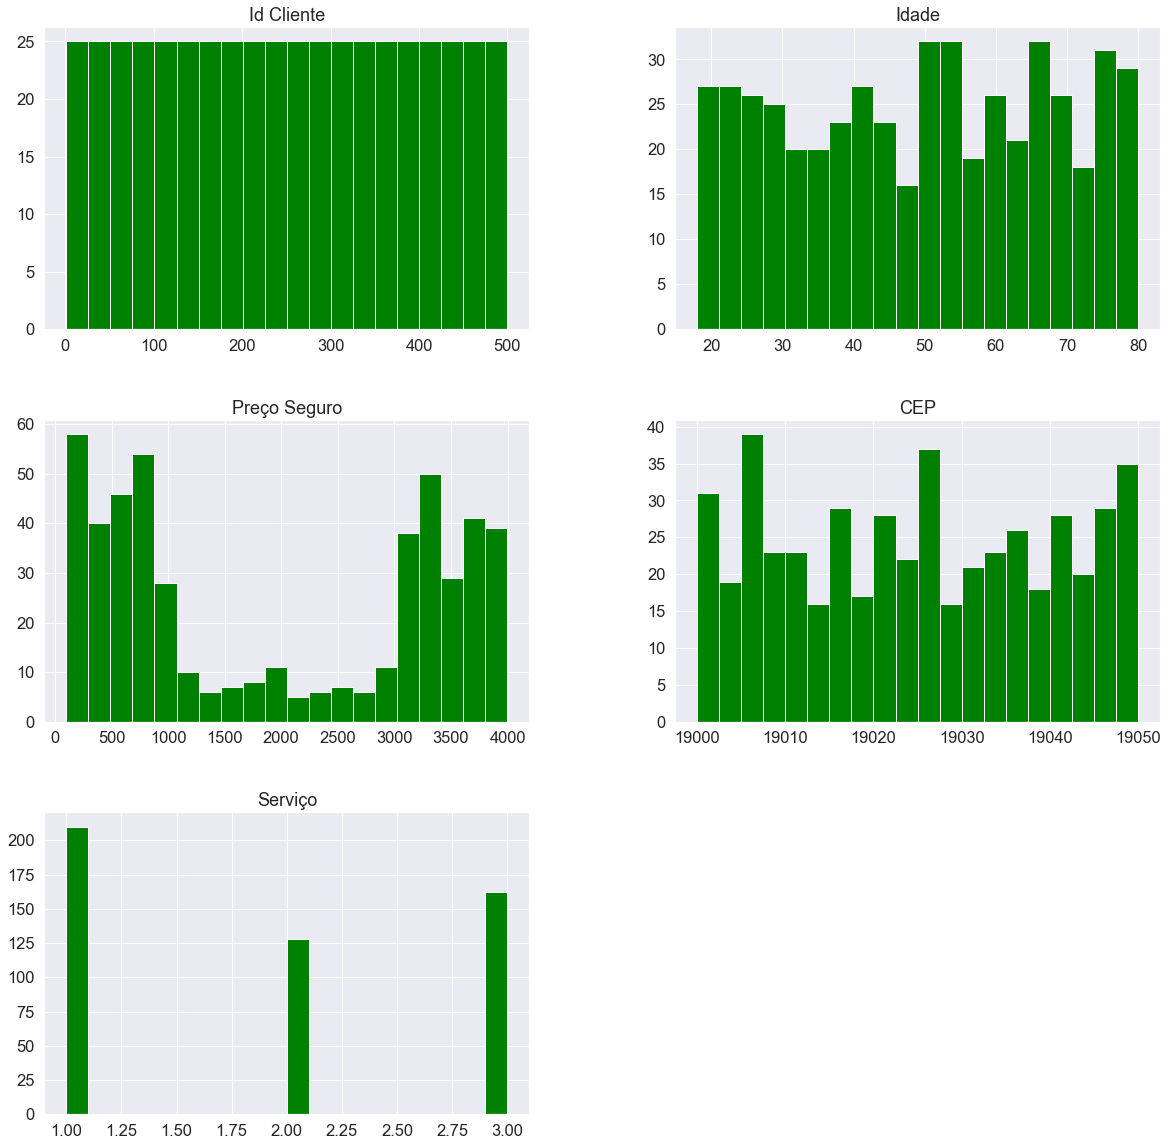

In [7]:
sns.set(font_scale=1.5, rc={"figure.figsize":(20,20)})
eixo = Base_Dados.hist( bins=20, color="green")

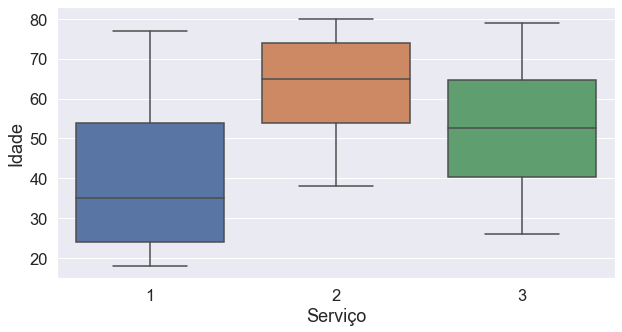

In [8]:
# Serviço x Idade
plt.figure( figsize=(10,5))
sns.boxplot( data=Base_Dados, x="Serviço", y="Idade");

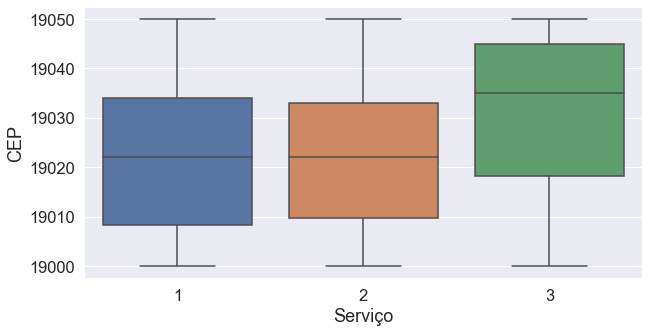

In [10]:
# Serviço x CEP
plt.figure( figsize=(10,5))
sns.boxplot( data=Base_Dados, x="Serviço", y="CEP");

In [12]:
Caracteristicas = Base_Dados.iloc[:,1:4].values
Previsor = Base_Dados.iloc[:,4:5].values

In [13]:
from sklearn.model_selection import train_test_split

x_treinameto, x_teste, y_treinamento, y_teste = train_test_split(
    Caracteristicas,
    Previsor,
    test_size=0.30,
    random_state=10
)

print(len(Base_Dados))
print(len(x_treinameto))
print(len(x_teste))

500
350
150


In [14]:
from sklearn.ensemble import RandomForestClassifier

Algoritmo_floresta_aleatoria = RandomForestClassifier( n_estimators=500)

Algoritmo_floresta_aleatoria.fit( x_treinameto, y_treinamento)

C:\Users\SERGURANCA\AppData\Local\Temp\ipykernel_740\2867827545.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Algoritmo_floresta_aleatoria.fit( x_treinameto, y_treinamento)


RandomForestClassifier(n_estimators=500)

[[59  4  1]
 [ 7 21  8]
 [ 0  1 49]]


<AxesSubplot:>

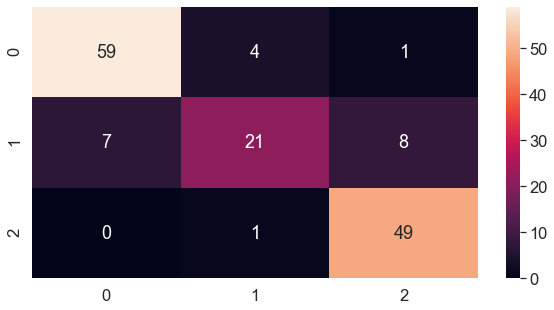

In [15]:
Previsoes = Algoritmo_floresta_aleatoria.predict( x_teste)

from sklearn.metrics import confusion_matrix
Matriz_Confusao = confusion_matrix( y_teste, Previsoes )
print( Matriz_Confusao )

plt.figure( figsize=(10,5))
sns.heatmap( Matriz_Confusao, annot=True )

In [16]:
from sklearn.metrics import classification_report

report = classification_report( y_teste, Previsoes )
print( report )

              precision    recall  f1-score   support

           1       0.89      0.92      0.91        64
           2       0.81      0.58      0.68        36
           3       0.84      0.98      0.91        50

    accuracy                           0.86       150
   macro avg       0.85      0.83      0.83       150
weighted avg       0.86      0.86      0.85       150



In [18]:
# Quais clientes podem vir a acionar o seguro futuramente?
Novas_vendas = pd.read_excel("BaseDados_FlorestaDeDecisão.xlsx", "Plan2")
Novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [19]:
Prever = Novas_vendas.iloc[:,1:4].values

Novas_vendas["Previsao do Modelo"] =  Algoritmo_floresta_aleatoria.predict( Prever )

In [22]:
Novas_vendas

,Id Cliente,Idade,Preço Seguro,CEP,Previsao do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1


In [23]:
Novas_vendas["Previsao do Modelo"].value_counts()
# Previsão de acionamento da seguradora referente aos clientes entrantes.

1    15
2     5
3     1
Name: Previsao do Modelo, dtype: int64